In [ ]:
# 在 Jupyter Notebook 中直接运行这个单元格
from strategy import *
from types import SimpleNamespace
import datetime as dt

import strategy

# 直接创建模拟参数（复制您的参数列表）
args = SimpleNamespace(
    # ClickHouse 配置
    ck_host="127.0.0.1",
    ck_port=9000,
    ck_user="stock", 
    ck_password="stock",
    ck_database="market",
    ck_table="cn_stock_daily",
    
    # 股票代码
    code="sh.600000",  # 或者您想测试的股票
    codes=None,  # 或者 codes=["sh.600000", "sz.000001"]
    
    # 回测周期
    start="2020-01-01",
    end=dt.date.today().isoformat(),
    
    # 策略参数
    fast=10,
    slow=30,
    
    # 资金参数
    cash=100000.0,
    commission=0.001,
    
    # 输出配置
    output="./output/backtest_notebook.png",
    chunk=100
)

print("参数设置完成！")
print(f"回测股票: {args.code}")
print(f"回测周期: {args.start} 到 {args.end}")
print(f"策略参数: 快线{args.fast}天, 慢线{args.slow}天")

参数设置完成！
回测股票: sh.600000
回测周期: 2020-01-01 到 2025-11-19
策略参数: 快线10天, 慢线30天
['sh.600000']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
cerebro = bt.Cerebro(preload=False)
codes = args.codes or [args.code]
print(codes)
for code in codes:
    start_dt = dt.datetime.fromisoformat(args.start)
    end_dt = dt.datetime.fromisoformat(args.end)
    data = PaginatedClickHouseOHLCV(
        host=args.ck_host,
        port=args.ck_port,
        user=args.ck_user,
        password=args.ck_password,
        database=args.ck_database,
        table=args.ck_table,
        code=code,
        fromdate=start_dt,
        todate=end_dt,
        chunk=args.chunk,
    )
    cerebro.adddata(data, name=code)
cerebro.addstrategy(SmaCross, fast=args.fast, slow=args.slow)

['sh.600000']


0

In [4]:
results = cerebro.run()
strat = results[0]

In [9]:
df = pd.DataFrame({
    'Open': strat.data.open.array,
    'High': strat.data.high.array,
    'Low': strat.data.low.array,
    'Close': strat.data.close.array,
    'Volume': strat.data.volume.array,
    'Signal': strat.lines.signal.array # 提取信号列
})

AttributeError: 'Lines_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_SmaCross' object has no attribute 'signal'

In [30]:
figs

[[<Figure size 1600x600 with 5 Axes>]]

In [15]:
from IPython.display import display

In [28]:
%matplotlib inline
for figrow in figs:
    for fig in figrow:
        fig.set_size_inches(16, 6)
        fig

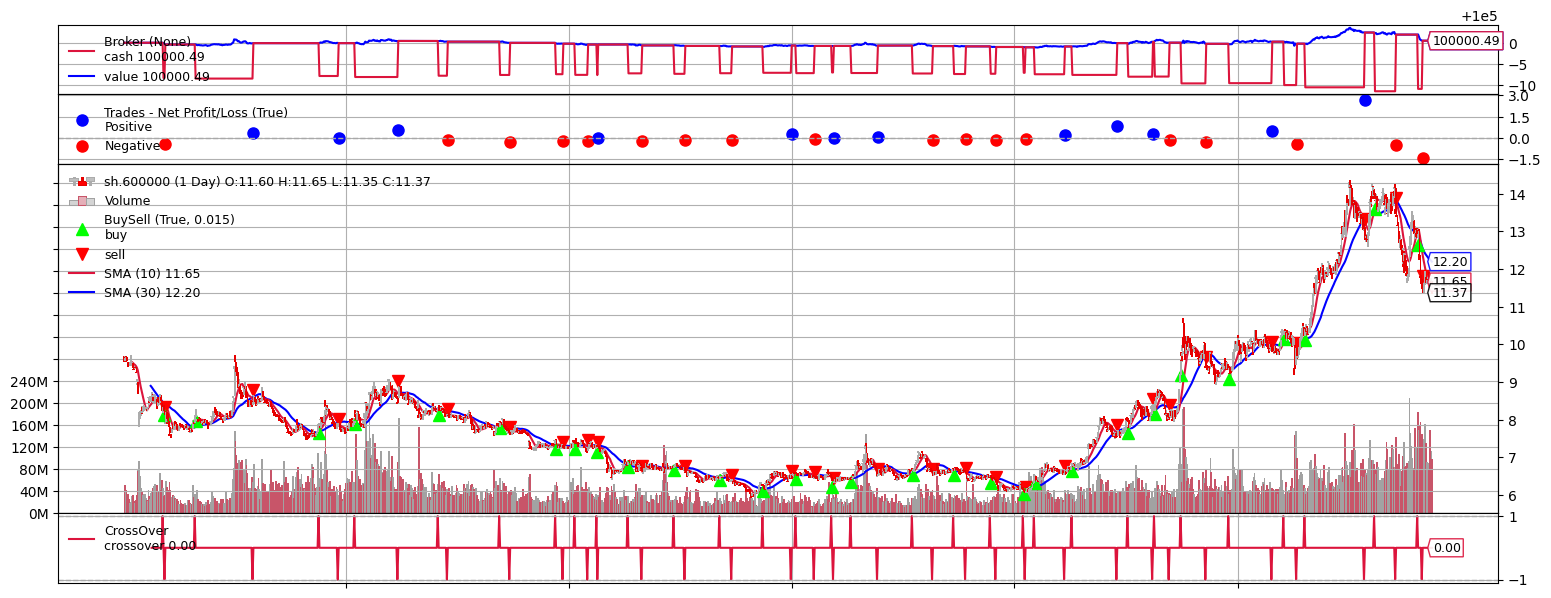

In [29]:
figs[0][0]